In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import particlesim.api
import particlesim.helpers_for_tests
import particlesim.utils.xyz
import particlesim.utils.config_parser
import particlesim.utils.conversion

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_nacl(traj,left,right,num_na,traj_sample = -1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    last_na_pos = traj[traj_sample,:num_na,:]
    last_cl_pos = traj[traj_sample,num_na:,:]
    
    a =(last_na_pos <= right)*(last_na_pos >=left)
    a = a[:,0]*a[:,1]*a[:,2]
    small_box_na = last_na_pos[a]
    b = (last_cl_pos <= right)*(last_cl_pos >=left)
    b = b[:,0]*b[:,1]*b[:,2]
    
    small_box_cl = last_cl_pos[b]
    ax.scatter(small_box_na[:,0],small_box_na[:,1],small_box_na[:,2],c='r')
    ax.scatter(small_box_cl[:,0],small_box_cl[:,1],small_box_cl[:,2],c='b')
    ax.set_xlim([left,right])
    ax.set_ylim([left,right])
    ax.set_zlim([left,right])


## Config File:


In [3]:
# %load /home/simon/Dokumente/Uni/CompSci/compscie-mc/jupyter_notebooks/config/8_particle_nacl_rand.cfg
[general]
box-size = 12

[particle_class_1]
label = Natrium
type = Na
charge = 1
distribution = uniform
number = 4

[particle_class_2]
label = Chlor
type = Cl
charge = -1
distribution = uniform
number = 4


SyntaxError: can't assign to operator (<ipython-input-3-95ccd9ceb08c>, line 3)

In [4]:
creator = particlesim.utils.config_parser.ProblemCreator("/home/simon/Dokumente/Uni/CompSci/compscie-mc/jupyter_notebooks/config/8_particle_nacl_rand.cfg")

In [5]:
system_config = creator.generate_problem()

In [6]:
sampler = particlesim.api.Sampler(system_config)

In [7]:
particlesim.utils.conversion.beta_to_kelvin(0.001)

503219.1485090949

In [8]:
len([0.1,1])

2

In [9]:
traj,pot = sampler.metropolis_sa(iteration_number=1000,beta=[0.1,1])

<IPython.core.display.Javascript object>


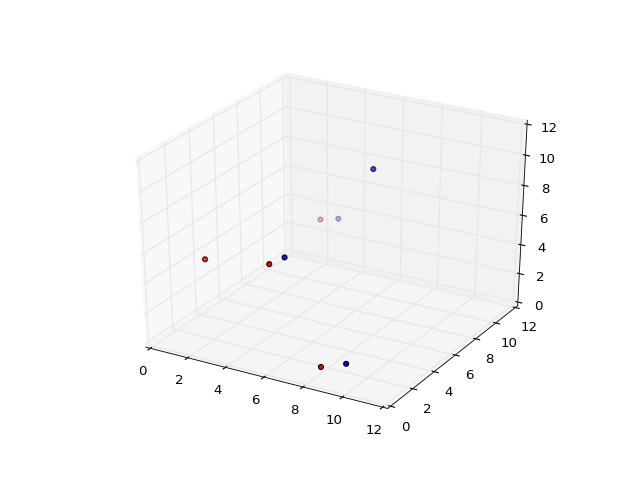

In [10]:
plot_nacl(traj=traj,left=0,right=12,num_na=4,traj_sample=-1)

In [11]:
def create_system_conf_with_na_and_cl(num_na, num_cl, box_size = 12):
    particles = particlesim.helpers_for_tests.create_positions(box_size=box_size,number_of_particles=num_na+num_cl)
    na = {'sigma':1.21496,'epsilon':0.0469,'charge':1}
    cl = {'sigma':2.02234, 'epsilon':0.15,'charge':-1.0}
    return particlesim.api.SystemConfiguration(xyz=particles, 
                                                      sigmas=([na['sigma']]*num_na)+([cl['sigma']]*num_cl),
                                                      epsilons=[na['epsilon']]*num_na+[cl['epsilon']]*num_cl,
                                                      charges=[na['charge']]*num_na+[cl['charge']]*num_cl,
                                                      box_size=box_size)


In [12]:
sys_conf_64 = create_system_conf_with_na_and_cl(8,8,12)

In [13]:
sampler2 = particlesim.api.Sampler(sys_conf_64)

In [14]:
iteration_number = 10000

In [15]:
beta = [0.2,0.8]
beta_values = 1.0 / np.linspace(1.0 / beta[1], 1.0 / beta[0], iteration_number)[::-1]

In [16]:
print("von ", particlesim.utils.conversion.beta_to_kelvin(beta[0]), " °K bis ", particlesim.utils.conversion.beta_to_kelvin(beta[1]), " °K")

von  2516.0957425454744  °K bis  629.0239356363686  °K


In [17]:
sys_conf_64.xyz = traj_64[-1]

NameError: name 'traj_64' is not defined

In [18]:
traj_64,pot_64 = sampler2.metropolis_sa(iteration_number,beta=beta,step=0.009)

<IPython.core.display.Javascript object>


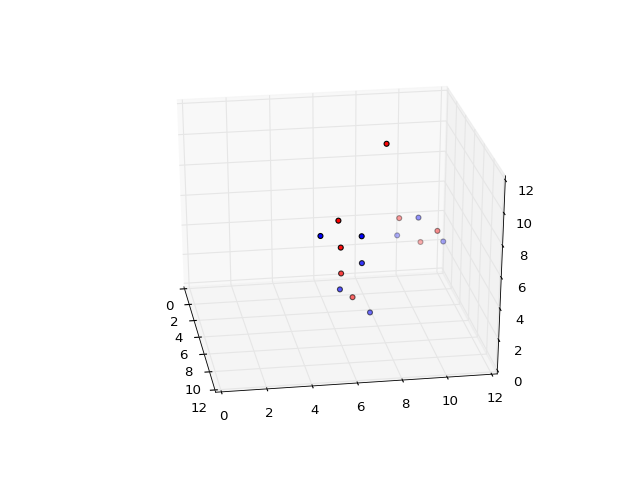

In [19]:
plot_nacl(traj=traj_64,left=0,right=12,num_na=8,traj_sample=-1)

In [20]:
pot_64[-1]

-2651.6433971863171

<IPython.core.display.Javascript object>


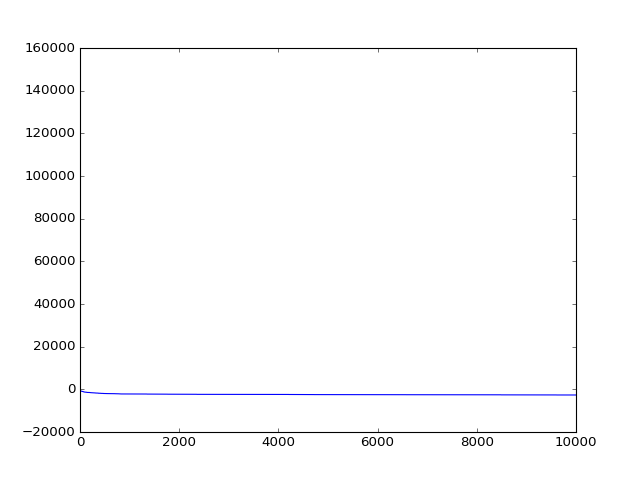

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pot_64)
#ax.set_ylim([pot_64[-1]-200,0])

In [22]:
dif = pot_64[:-1] - pot_64[1:]

<IPython.core.display.Javascript object>


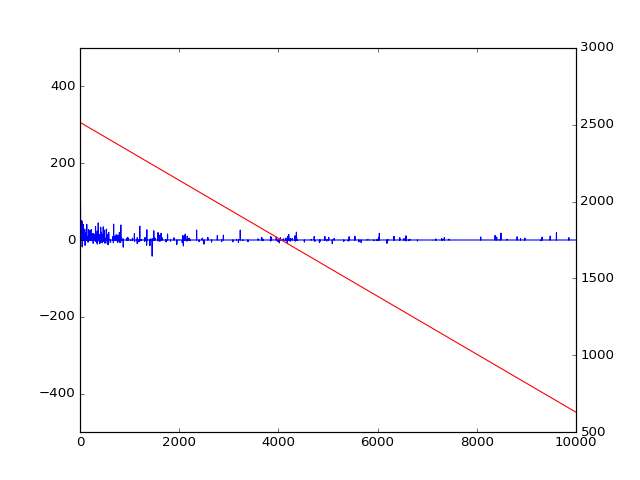

(-500, 500)

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dif)
ax2 = ax.twinx()
ax2.plot(particlesim.utils.conversion.beta_to_kelvin(beta_values), c='r')
ax.set_ylim([-500,500])